Summary  
housing_data_df2 = cleaned dataset for the project, looking at 2016-2018  
housing_data_df3 = looking at 2016-2017 only  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = housing dataset with location focused  
interest_rate_df2 = monthly interest rate from 2016-2017  

In [20]:
# import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import warnings
import scipy.stats as st
from scipy.stats import linregress

housing_data_file = Path('Resources/melb_housing_data.csv')
interest_rate_file = Path('Resources/F5_Indicator_Lending_Rates.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
interest_rate_df = pd.read_csv(interest_rate_file, low_memory=False, encoding='UTF-8')


In [21]:
# Raw housing dataset
housing_data_df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [22]:
# Housing_data_df2 = clean dataset, Year:2016-2018, sorted by Date

# reduced columns in housing dataset
columns_to_use = ['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Bedroom','Propertycount', 'Distance', 'Landsize', 'Latitude', 'Longtitude', 'Price']
housing_data_df_reduced = housing_data_df[columns_to_use]

# dropna in housing dataset
housing_data_df2 = housing_data_df_reduced.dropna(how='any')

# separate Date into Month and Year columns
warnings.filterwarnings('ignore')
housing_data_df2['Date'] = pd.to_datetime(housing_data_df2['Date'], format='%d/%m/%Y')
housing_data_df2['Month'] = housing_data_df2['Date'].dt.month
housing_data_df2['Year'] = housing_data_df2['Date'].dt.year

# rearanging columns in housing dataset + sort by Date
housing_data_df2 = housing_data_df2[['Suburb', 'Address', 'Regionname', 'Type', 'Date', 'Year', 'Month', 'Bedroom', 'Propertycount', 'Distance', 'Landsize', 'Latitude', 'Longtitude', 'Price']]
housing_data_df2 = housing_data_df2.sort_values(['Year','Month'],ascending=True).reset_index(drop=True)
housing_data_df2


,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0
4,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,13.0,299.0,-37.92720,145.04060,1222500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,Yarraville,23 Frederick St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,6.3,294.0,-37.81973,144.89735,1125000.0
17950,Yarraville,134 Gamon St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,6.3,597.0,-37.81281,144.88912,1575000.0
17951,Yarraville,42 Kingston St,Western Metropolitan,h,2018-03-17,2018,3,2.0,6543.0,6.3,188.0,-37.81449,144.88065,939000.0
17952,Yarraville,25 Ovens St,Western Metropolitan,h,2018-03-17,2018,3,3.0,6543.0,6.3,207.0,-37.81846,144.89216,855000.0


In [23]:
# Check for any NaN values
housing_data_df2.isna().sum()


Suburb           0
Address          0
Regionname       0
Type             0
Date             0
Year             0
Month            0
Bedroom          0
Propertycount    0
Distance         0
Landsize         0
Latitude         0
Longtitude       0
Price            0
dtype: int64

In [24]:
# Housing_data_df3 = Year: 2016-2017
housing_data_df3 = housing_data_df2.loc[housing_data_df2['Year']!=2018,:]
housing_data_df3

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0
4,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,13.0,299.0,-37.92720,145.04060,1222500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15655,Wollert,20 Whitebark St,Northern Metropolitan,h,2017-12-09,2017,12,4.0,2940.0,25.5,411.0,-37.61212,145.04084,615000.0
15656,Wyndham Vale,56 Aldridge Rd,Western Metropolitan,h,2017-12-09,2017,12,4.0,5262.0,27.2,700.0,-37.89738,144.61158,632000.0
15657,Wyndham Vale,18 Greenwood St,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,567.0,-37.89087,144.62252,425000.0
15658,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,613.0,-37.89552,144.61926,415000.0


In [25]:
# Housing_data_df4 = looking at 3 bedrooms houses only

housing_data_df4 = housing_data_df3.loc[(housing_data_df3['Type']=='h')&(housing_data_df3['Bedroom']==3.0),:].reset_index(drop=True) 
housing_data_df4 = housing_data_df4.drop(columns = ['Type','Bedroom'])
print(len(housing_data_df4))
housing_data_df4.head(3)


5784


,Suburb,Address,Regionname,Date,Year,Month,Propertycount,Distance,Landsize,Latitude,Longtitude,Price
0,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,2016-01-28,2016,1,5457.0,11.2,490.0,-37.8361,145.1006,1205000.0
1,Bentleigh,11A Mortimore St,Southern Metropolitan,2016-02-04,2016,2,6795.0,13.0,299.0,-37.9272,145.0406,1222500.0
2,Burwood,163 Highbury Rd,Southern Metropolitan,2016-02-04,2016,2,5678.0,11.7,695.0,-37.8551,145.1121,1151000.0


In [28]:
# Raw interest rate dataset
interest_rate_df.head()

,Title,Lending rates; Small business; Variable; Term,Lending rates; Small business; Variable; Overdraft,Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Discounted; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Standard interest-only; Owner-occupier,Lending rates; Housing loans; Banks; 3-year fixed; Owner-occupier,Lending rates; Housing loans; Banks; Variable; Standard; Investor,Lending rates; Housing loans; Banks; Variable; Discounted; Investor,Lending rates; Housing loans; Banks; Variable; Standard interest-only; Investor,...,Lending rates; Personal loans; Term loans (unsecured); Variable,Lending rates; Personal loans; Revolving credit; Home equity loans,Lending rates; Personal loans; Revolving credit; Margin loans,Lending rates; Housing loans; Mortgage managers; Variable; Standard,Lending rates; Housing loans; Mortgage managers; Variable; Basic,Lending rates; Securitised housing loans; Average outstanding variable rate,Lending rates; Securitised housing loans; Average outstanding variable rate; Owner-occupier; Principal & Interest,Lending rates; Securitised housing loans; Average outstanding variable rate; Owner-occupier; Interest Only,Lending rates; Securitised housing loans; Average outstanding variable rate; Investor; Principal & Interest,Lending rates; Securitised housing loans; Average outstanding variable rate; Investor; Interest Only
0,Description,Lending rates; Small business; Variable; Term,Lending rates; Small business; Variable; Overd...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; 3-year fi...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,Lending rates; Housing loans; Banks; Variable;...,...,Lending rates; Personal loans; Term loans (uns...,Lending rates; Personal loans; Revolving credi...,Lending rates; Personal loans; Revolving credi...,Lending rates; Housing loans; Mortgage manager...,Lending rates; Housing loans; Mortgage manager...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...,Lending rates; Securitised housing loans; Aver...
1,Frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
2,Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
3,Units,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,...,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum,Per cent per annum
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Interest_rate_df2 = clean interest rate dataset

# selecting Interest rates from 2016 to 2017
interest_rate_df2 = interest_rate_df.iloc[21:45].reset_index(drop=True)

# reducing columns relevent to housing interest rate + renaming them
interest_rate_df2 = interest_rate_df2[['Title', 'Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier']]
interest_rate_df2 = interest_rate_df2.rename(columns={
                    'Title': 'Period',
                    'Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier': 'Housing Interest Rate'
                    })

# spliting Date into 'Month' and 'Year' 
interest_rate_df2[['Month', 'Year']] = interest_rate_df2['Period'].str.split('-', expand=True)
interest_rate_df2['Month'] = pd.to_datetime(interest_rate_df2['Month'], format='%b').dt.month
interest_rate_df2[['Month', 'Year']] = interest_rate_df2[['Month', 'Year']].astype(int)
interest_rate_df2


,Period,Housing Interest Rate,Month,Year
0,Jan-2016,5.63,1,2016
1,Feb-2016,5.63,2,2016
2,Mar-2016,5.63,3,2016
3,Apr-2016,5.63,4,2016
4,May-2016,5.39,5,2016
5,Jun-2016,5.39,6,2016
6,Jul-2016,5.39,7,2016
7,Aug-2016,5.26,8,2016
8,Sep-2016,5.26,9,2016
9,Oct-2016,5.26,10,2016


In [30]:
# Merging Housing data and Interest Rate, Year: 2016-2017

housing_and_irate_df = pd.merge(housing_data_df3, interest_rate_df2, how='left', on=['Year', 'Month'])
housing_and_irate_df = housing_and_irate_df.sort_values(by=['Year','Month'], ascending=True).reset_index(drop=True)
housing_and_irate_df

,Suburb,Address,Regionname,Type,Date,Year,Month,Bedroom,Propertycount,Distance,Landsize,Latitude,Longtitude,Price,Period,Housing Interest Rate
0,Surrey Hills,1/10 Florence Rd,Southern Metropolitan,u,2016-01-28,2016,1,2.0,5457.0,11.2,108.0,-37.82760,145.10230,813000.0,Jan-2016,5.63
1,Surrey Hills,999A Riversdale Rd,Southern Metropolitan,h,2016-01-28,2016,1,3.0,5457.0,11.2,490.0,-37.83610,145.10060,1205000.0,Jan-2016,5.63
2,Abbotsford,25 Bloomburg St,Northern Metropolitan,h,2016-02-04,2016,2,2.0,4019.0,2.5,156.0,-37.80790,144.99340,1035000.0,Feb-2016,5.63
3,Altona,1/123 Blyth St,Western Metropolitan,t,2016-02-04,2016,2,2.0,5301.0,13.8,292.0,-37.86870,144.81970,720000.0,Feb-2016,5.63
4,Bentleigh,11A Mortimore St,Southern Metropolitan,h,2016-02-04,2016,2,3.0,6795.0,13.0,299.0,-37.92720,145.04060,1222500.0,Feb-2016,5.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15655,Wollert,20 Whitebark St,Northern Metropolitan,h,2017-12-09,2017,12,4.0,2940.0,25.5,411.0,-37.61212,145.04084,615000.0,Dec-2017,5.22
15656,Wyndham Vale,56 Aldridge Rd,Western Metropolitan,h,2017-12-09,2017,12,4.0,5262.0,27.2,700.0,-37.89738,144.61158,632000.0,Dec-2017,5.22
15657,Wyndham Vale,18 Greenwood St,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,567.0,-37.89087,144.62252,425000.0,Dec-2017,5.22
15658,Wyndham Vale,26 Ribblesdale Av,Western Metropolitan,h,2017-12-09,2017,12,3.0,5262.0,27.2,613.0,-37.89552,144.61926,415000.0,Dec-2017,5.22


In [31]:
# Dataset for housing_sale_counts & housing_price vs interest_rate over time. 

# Counting the number of houses sold 2016-2017
houses_sold_count = pd.DataFrame(housing_and_irate_df.groupby(housing_and_irate_df['Period'])['Address'].size()).reset_index().rename(columns={'Address':'Sale Counts'})
houses_sold_price = pd.DataFrame(housing_and_irate_df.groupby(housing_and_irate_df['Period'])['Price'].mean()).round(2).reset_index().rename(columns={'Price':'Average Price'})

# Merging the Houses sold to corrsponding Housing Interest Rate for comparision 
housing_and_irate_df2 = pd.merge(houses_sold_count, interest_rate_df2, how='outer', on=['Period'])
housing_and_irate_df2 = pd.merge(housing_and_irate_df2, houses_sold_price, how='outer', on=['Period'])
housing_and_irate_df2 = housing_and_irate_df2.sort_values(by=['Year','Month'], ascending=True).reset_index(drop=True)
housing_and_irate_df2 = housing_and_irate_df2[['Year','Month','Period','Sale Counts', 'Average Price', 'Housing Interest Rate']]
window_size=3
housing_and_irate_df2['Sale Counts'] = housing_and_irate_df2['Sale Counts'].fillna(housing_and_irate_df2['Sale Counts'].rolling(window=window_size, min_periods=1, center=True).mean())
housing_and_irate_df2['Average Price'] = housing_and_irate_df2['Average Price'].fillna(housing_and_irate_df2['Average Price'].rolling(window=window_size, min_periods=1, center=True).mean())
housing_and_irate_df2

,Year,Month,Period,Sale Counts,Average Price,Housing Interest Rate
0,2016,1,Jan-2016,2.0,1009000.000,5.63
1,2016,2,Feb-2016,26.0,908182.690,5.63
2,2016,3,Mar-2016,172.0,952112.965,5.63
3,2016,4,Apr-2016,318.0,996043.240,5.63
4,2016,5,May-2016,899.0,1046063.180,5.39
5,2016,6,Jun-2016,732.0,1048369.180,5.39
6,2016,7,Jul-2016,446.0,941296.960,5.39
7,2016,8,Aug-2016,716.0,1073528.700,5.26
8,2016,9,Sep-2016,925.0,1099378.490,5.26
9,2016,10,Oct-2016,551.0,1065340.630,5.26


In [44]:
housing_and_irate_df2['Dates']=pd.to_datetime(housing_and_irate_df2['Period'], format='%b-%Y')
housing_and_irate_df2['Dates'] = housing_and_irate_df2['Dates'].dt.strftime('%m%Y').astype(int)
dates = housing_and_irate_df2["Dates"]
sale_counts = housing_and_irate_df2["Sale Counts"]
housing_and_irate_df2['Dates']

0      12016
1      22016
2      32016
3      42016
4      52016
5      62016
6      72016
7      82016
8      92016
9     102016
10    112016
11    122016
12     12017
13     22017
14     32017
15     42017
16     52017
17     62017
18     72017
19     82017
20     92017
21    102017
22    112017
23    122017
Name: Dates, dtype: int32

In [43]:
lr_slope, lr_int, lr_r, lr_p, lr_std_err = st.linregress(dates,sale_counts)

In [ ]:
housing_and_irate_df3 = pd.DataFrame(housing_and_irate_df2.groupby(housing_and_irate_df2['Housing Interest Rate'])['Sale Counts'].sum()).reset_index()
housing_and_irate_df3 = housing_and_irate_df3.rename(columns={'Sale Counts':'Sale Counts (sum)'})
housing_and_irate_df3

,Housing Interest Rate,Sale Counts (sum)
0,5.22,5370.0
1,5.23,1098.0
2,5.26,4842.0
3,5.28,1309.0
4,5.29,1130.0
5,5.39,2077.0
6,5.63,518.0


## Number of Houses sold 2016-2017

## Does the changes in interest rates impact the real estate market in Melbourne?

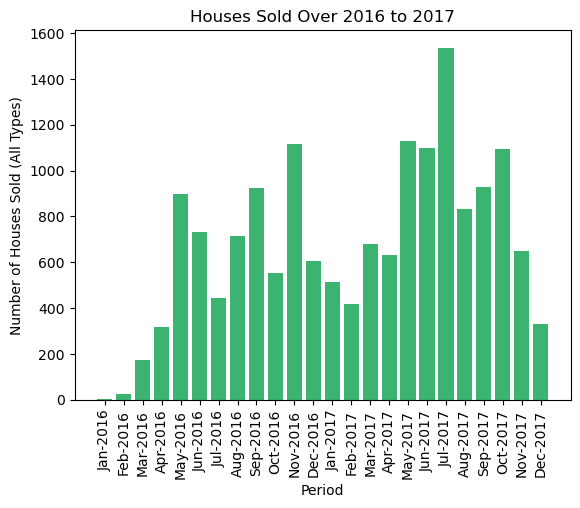

In [ ]:
# Bar plot for houses sold in 2016-2017 & houses sold vs interest rate
plt.bar(housing_and_irate_df2['Period'], housing_and_irate_df2['Sale Counts'], label='Houses Sold', color='mediumseagreen')
plt.title('Houses Sold Over 2016 to 2017')
plt.xlabel('Period')
plt.ylabel('Number of Houses Sold (All Types)')
plt.xticks(rotation=90)
plt.show()

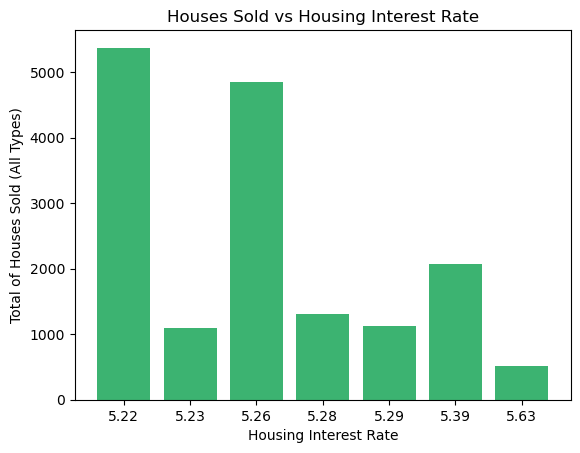

In [ ]:
# Bar plot for Sale counts vs Interest rate
plt.bar(housing_and_irate_df3['Housing Interest Rate'], housing_and_irate_df3['Sale Counts (sum)'], color='mediumseagreen')
plt.title('Houses Sold vs Housing Interest Rate')
plt.xlabel('Housing Interest Rate')
plt.ylabel('Total of Houses Sold (All Types)')
plt.show()

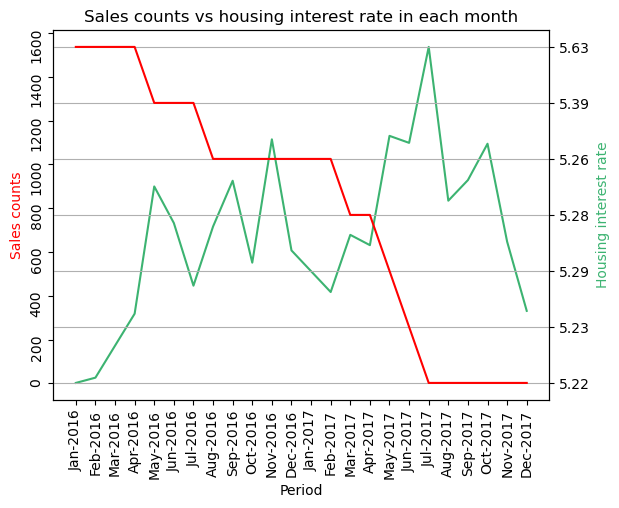

In [ ]:
# Plot for Sale counts vs Interest rate over time. 
count_x=housing_and_irate_df2['Period']
count_y1=housing_and_irate_df2['Sale Counts']
count_y2=housing_and_irate_df2['Housing Interest Rate']
fig,ax1=plt.subplots()
ax1.plot(count_x,count_y1,label='Sale counts', c='mediumseagreen')
ax2=ax1.twinx()
ax2.plot(count_x,count_y2,c='r',label='Housing interest rate')
plt.title ('Sales counts vs housing interest rate in each month')
ax1.set_xlabel('Period')
ax1.set_ylabel('Sales counts',c='r')
ax2.set_ylabel('Housing interest rate',c='mediumseagreen')
ax2.invert_yaxis()
ax1.tick_params(rotation=90)
plt.grid()


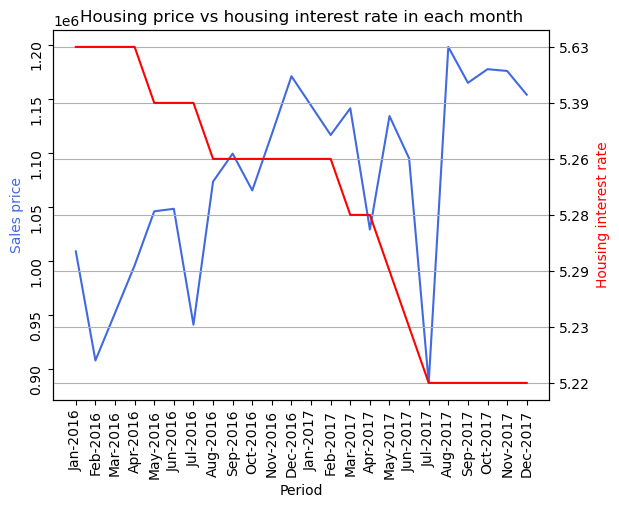

In [ ]:
#Plots for Housing price vs Interest rate over time
price_x=housing_and_irate_df2['Period']
price_y1=housing_and_irate_df2['Average Price']
price_y2=housing_and_irate_df2['Housing Interest Rate']
fig,ax1=plt.subplots()
ax1.plot(price_x,price_y1,label='Average price',c='royalblue')
ax2=ax1.twinx()
ax2.plot(price_x,price_y2,c='r',label='Housing interest rate')
plt.title ('Housing price vs housing interest rate in each month')
ax1.set_xlabel('Period')
ax1.set_ylabel('Sales price',c='royalblue')
ax2.set_ylabel('Housing interest rate', c='r')
ax2.invert_yaxis()
ax1.tick_params(rotation=90)
plt.grid()

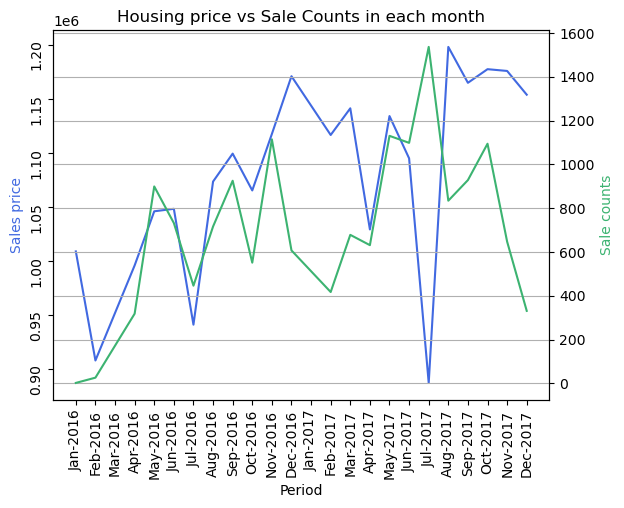

In [ ]:
#Plots for Housing price vs Sale counts over time
x=housing_and_irate_df2['Period']
price_y1=housing_and_irate_df2['Average Price']
count_y2=housing_and_irate_df2['Sale Counts']
fig,ax2=plt.subplots()
ax2.plot(x,price_y1,label='Average price',c='royalblue')
ax3=ax2.twinx()
ax3.plot(x,count_y2,c='mediumseagreen',label='Sale Counts')
plt.title ('Housing price vs Sale Counts in each month')
ax2.set_xlabel('Period')
ax2.set_ylabel('Sales price',c='royalblue')
ax3.set_ylabel('Sale counts',c='mediumseagreen')
#ax2.invert_yaxis()
ax2.tick_params(rotation=90)
plt.grid()
